In [1]:
import pandas as pd
pd.set_option('display.max_rows', 5) #instead us using df.head()
pd.set_option('display.max_columns', 80) #to see all rows
import os
import numpy as np
import matplotlib.pyplot as plt
location = os.getcwd()
file="\Cities.xls"
path = location+file
df = pd.read_excel(path)
pd.set_option('chained_assignment',None) #turn off chained assignment warnings 
#description of variables: 
#https://www.dropbox.com/sh/1w131yft8tysndx/AADJcrNsu9m4wchBo69gOcBxa?dl=0&preview=0-Summary-of-Indicators-and-Sources.xlsx

In [2]:
df.head()

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),CO2 Emissions per Capita (metric tonnes),Pollution Index,Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
284,Baltimore(MD),285,7,Auto Sprawl,United States,85.0,6.1,0.3,2.6,0.66,8.5,24.9,0.013409,0.615385,6.417582,34,0.0,0.000000,0.000000,0.000000,0.000000,0.0,50,2.197802,NaN,0.00000,2.0,19.0,33.0,46.0,148.97,36.90,150.22,2275000,1857,1200,233673,332204,399059,195708,81.6,1.7,58789.0,7.20,77.33,48.58,76.48,78.28,150.69,0.443,22.9,78.8,31.19,81.0,0.78,45.0,72.0,14.300000,NaN,7468900.983,7.604833e+09,148.013337,28660.0,1018.199702,5.021972,2.869906,1.067736,0.007910,0.041018,0.160848,0.176867,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187
9,Melbourne,10,8,Auto Innovative,Australia,80.0,14.0,2,4.0,1.11,5.4,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,50,1.264223,600.0,15.17067,2.0,33.0,55.0,58.0,143.12,35.57,138.17,3955000,2543,1500,316060,462816,715525,350883,89.4,1.2,39358.0,5.50,79.04,44.30,72.93,76.07,139.62,NaN,NaN,82.0,60.23,86.9,0.74,50.0,77.0,10.200000,26.77,8636838.530,8.653670e+09,107.503591,48571.0,1001.948856,4.948413,2.876305,1.036985,0.001626,0.014489,0.060387,0.168335,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910
185,Niamey,186,1,Congested Emerging,Niger,NaN,9.0,2,60.0,1.02,26.4,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0.0,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1435000,130,11100,248392,541978,960996,741379,18.7,3.5,427.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,61.8,NaN,2.4,0.04,NaN,NaN,0.106861,NaN,2134329.200,3.496995e+09,97.860119,13033.0,1638.451450,6.161297,3.187450,1.019423,0.000095,0.000000,0.036220,0.010915,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312
327,Hanoi,328,12,MetroBike Emerging,Vietnam,8.0,10.0,2,NaN,0.90,24.5,0.0,0.000000,0.000000,0.000000,0,14.5,NaN,0.143000,NaN,0.149000,1.0,0,0.000000,0.0,0.00000,0.0,NaN,NaN,NaN,160.60,40.78,189.18,7445000,868,8600,520495,1149423,1391900,608994,33.6,6.3,3425.0,6.84,41.73,17.15,37.25,22.72,23.47,0.340,5.4,76.0,54.64,50.1,0.31,35.0,35.0,1.700368,89.66,8079366.816,1.156634e+09,300.370541,15881.0,143.158938,5.205795,2.870473,1.097533,0.000921,0.022938,0.078028,0.084511,0.358868,0.157676,0.509057,0.292564,0.624623,0.666710,0.239113
66,Urumqi,67,12,MetroBike Emerging,China,21.7,54.7,NaN,NaN,1.16,18.8

In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%','p').str.replace('–_','').str.replace('.','').str.replace('/','')

In [4]:
df = df.set_index('cityid')
df = df.sort_index()

In [5]:
#columns with non int/float values
df.select_dtypes(exclude=['float64','int64']).columns

Index(['city', 'typology', 'country', 'bicycle_modeshare_p',
       'bikeshare_stations'],
      dtype='object')

In [6]:
#Change string " " to np.nan to make it numeric instead of object
df['bikeshare_stations'].loc[df['bikeshare_stations'] == " "] = np.nan
df['bicycle_modeshare_p'].loc[df['bicycle_modeshare_p'] == " "] = np.nan

df['bikeshare_stations'] = pd.to_numeric(df['bikeshare_stations'])
df['bicycle_modeshare_p'] = pd.to_numeric(df['bicycle_modeshare_p'])

In [7]:
df.select_dtypes(exclude=['float64','int64']).columns

Index(['city', 'typology', 'country'], dtype='object')

In [8]:
#Number of columns (plus clusterid)
len(df.select_dtypes(include=['float64','int64']).columns)

74

# Data 3
18 columns

In [9]:
#economic
df[df.select_dtypes(include=['float64','int64']).columns].iloc[:,38:55]

,gdp_per_capita_usd,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,life_expectancy_years,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,co2_emissions_per_capita_metric_tonnes,pollution_index
cityid,,,,,,,,,,,,,,,,,
1,617.9,38.0,NaN,NaN,NaN,NaN,NaN,0.29,27.6,60.5,NaN,12.3,NaN,NaN,NaN,0.693183,104.20
2,4827.7,10.0,34.98,10.09,34.96,26.43,39.57,0.37,NaN,75.6,52.52,37.3,0.37,28.0,NaN,3.514780,74.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,1627.3,NaN,51.32,29.96,37.22,33.52,124.62,0.50,27.5,61.8,NaN,20.4,0.17,NaN,NaN,0.250863,NaN
331,917.6,NaN,52.63,15.61,41.37,43.07,28.58,0.38,46.5,60.7,49.36,46.5,0.29,NaN,NaN,0.924990,73.67


In [10]:
#Latent urban factors
df[df.select_dtypes(include=['float64','int64']).columns].iloc[:,68:69]

,development_factor
cityid,
1,0.029561
2,0.118424
...,...
330,0.126954
331,0.171572


In [11]:
df[df.select_dtypes(include=['float64','int64']).columns].iloc[:,38:39]

,gdp_per_capita_usd
cityid,
1,617.9
2,4827.7
...,...
330,1627.3
331,917.6


In [12]:
df2 = df[df.select_dtypes(include=['float64','int64']).columns].iloc[:,38:55]

In [13]:
pd.set_option('display.max_rows', 20)

In [14]:
df2.describe()

,gdp_per_capita_usd,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,life_expectancy_years,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,co2_emissions_per_capita_metric_tonnes,pollution_index
count,331.000000,193.000000,223.000000,223.000000,223.000000,223.000000,223.000000,226.000000,194.000000,331.000000,207.000000,330.000000,324.000000,258.000000,219.000000,331.000000,170.000000
mean,25398.480846,7.807409,58.721121,28.269910,53.744439,52.883767,83.786637,0.427235,21.290825,74.402523,52.420483,57.426667,0.524599,39.678295,53.452055,7.397879,60.474765
std,22422.648624,6.235819,20.934314,20.337176,21.468003,24.713496,39.246045,0.090711,12.611445,7.206536,15.514069,24.497672,0.220449,7.598970,19.906461,6.538615,22.425744
min,352.600000,0.200000,23.770000,4.430000,19.010000,14.430000,2.710000,0.220000,0.150000,50.100000,14.050000,2.100000,0.040000,17.000000,4.000000,0.038311,11.000000
25%,5695.700000,4.000000,40.445000,13.380000,35.360000,31.330000,47.830000,0.362500,13.000000,70.700000,42.115000,43.000000,0.397500,34.000000,39.000000,1.894512,41.170000
50%,17979.000000,6.400000,60.140000,23.690000,52.470000,49.630000,86.220000,0.440000,18.700000,76.100000,52.150000,59.900000,0.500000,40.000000,58.000000,6.200000,63.215000
75%,43633.000000,8.800000,74.625000,37.155000,70.590000,72.460000,117.065000,0.471000,28.097500,79.600000,63.615000,76.200000,0.770000,44.000000,72.000000,11.200000,77.995000
max,86830.000000,38.000000,147.990000,144.320000,131.280000,135.800000,173.640000,0.750000,61.600000,85.000000,85.430000,95.000000,0.850000,60.000000,88.000000,44.100000,104.200000


In [15]:
df2.isnull().sum()/len(df2)

gdp_per_capita_usd                        0.000000
unemployment_rate_p                       0.416918
cost_of_living_index                      0.326284
rent_index                                0.326284
grocery_index                             0.326284
restaurant_price_index                    0.326284
local_purchasing_power_index              0.326284
gini_coefficient                          0.317221
poverty_rate_p                            0.413897
life_expectancy_years                     0.000000
safety_index                              0.374622
internet_penetration                      0.003021
digital_penetration                       0.021148
innovation_index                          0.220544
smartphone_penetration_p                  0.338369
co2_emissions_per_capita_metric_tonnes    0.000000
pollution_index                           0.486405
dtype: float64

In [16]:
#create a list of the columns with missing values
dfc = ['city', 'typology', 'country']
dfn = ['city', 'typology', 'country']
for d in df2:
    if df2[d].isnull().sum() > 0:
        dfc.append(d)
    else:
        dfn.append(d)

In [17]:
df[df.select_dtypes(include=['float64','int64']).columns].iloc[:,68:69].isnull().sum()

development_factor    0
dtype: int64

In [18]:
dfc

['city',
 'typology',
 'country',
 'unemployment_rate_p',
 'cost_of_living_index',
 'rent_index',
 'grocery_index',
 'restaurant_price_index',
 'local_purchasing_power_index',
 'gini_coefficient',
 'poverty_rate_p',
 'safety_index',
 'internet_penetration',
 'digital_penetration',
 'innovation_index',
 'smartphone_penetration_p',
 'pollution_index']

In [19]:
dfn

['city',
 'typology',
 'country',
 'gdp_per_capita_usd',
 'life_expectancy_years',
 'co2_emissions_per_capita_metric_tonnes']

In [20]:
df3 = df[dfc]
df3.head()

,city,typology,country,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,pollution_index
cityid,,,,,,,,,,,,,,,,,
1,Kabul,Congested Emerging,Afghanistan,38.0,NaN,NaN,NaN,NaN,NaN,0.29,27.6,NaN,12.3,NaN,NaN,NaN,104.20
2,Algiers,Congested Emerging,Algeria,10.0,34.98,10.09,34.96,26.43,39.57,0.37,NaN,52.52,37.3,0.37,28.0,NaN,74.18
3,Oran,BusTransit Sprawl,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,0.37,NaN,NaN,37.3,0.37,NaN,NaN,NaN
4,Luanda,Congested Boomer,Angola,25.0,147.99,144.32,131.28,112.84,25.09,0.62,18.7,34.99,29.5,0.11,21.0,NaN,NaN
5,Huambo,Congested Emerging,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.7,NaN,29.5,0.11,NaN,NaN,NaN


# Detecting of outliers

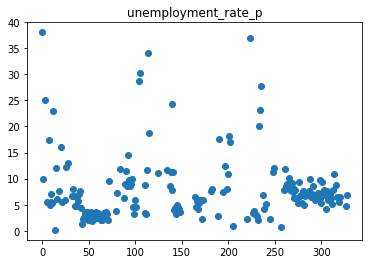

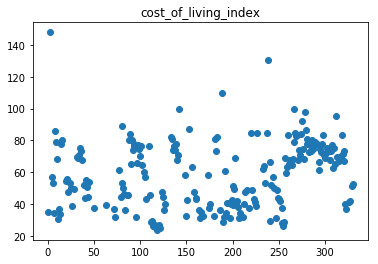

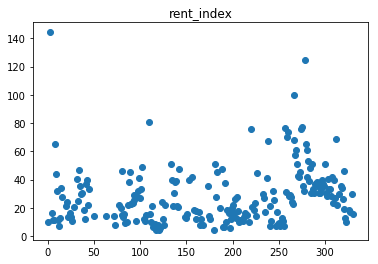

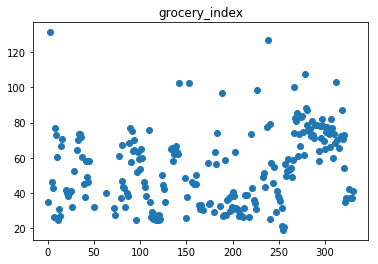

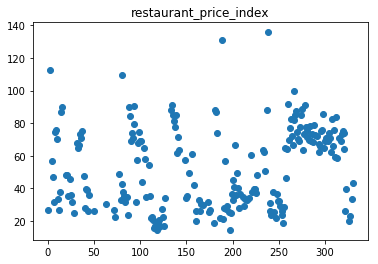

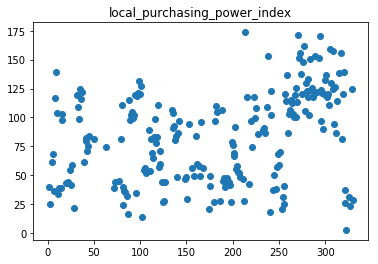

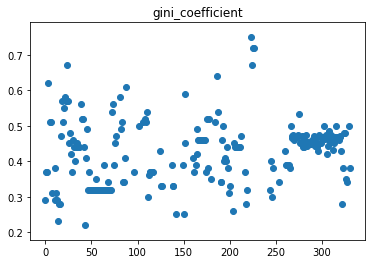

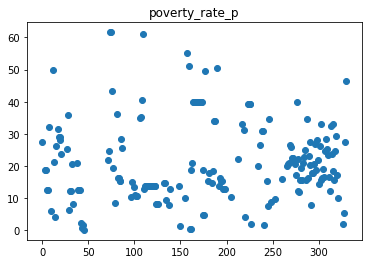

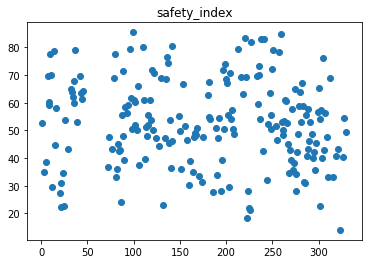

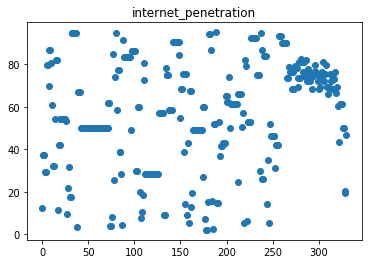

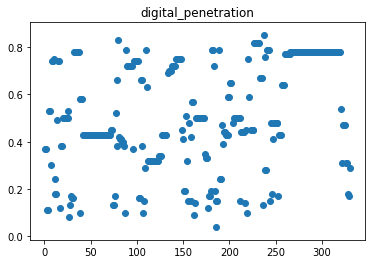

In [21]:
for i in range(3,len(df3.columns)-3):
    plt.scatter(range(0,len(df3)),df3.iloc[:,i])
    plt.title(df3.columns[i])
    plt.show()

In [22]:
label = dfc[3]
print(label)
df3.loc[df3[label] > 30]
#found to be realistic values

unemployment_rate_p


,city,typology,country,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,pollution_index
cityid,,,,,,,,,,,,,,,,,
1,Kabul,Congested Emerging,Afghanistan,38.0,NaN,NaN,NaN,NaN,NaN,0.29,27.6,NaN,12.3,NaN,NaN,NaN,104.20
106,Thessaloniki,MassTransit Moderate,Greece,30.2,56.97,10.59,43.19,58.00,56.06,NaN,NaN,66.09,59.9,0.66,37.0,NaN,60.54
115,Kolkata,Congested Boomer,India,34.0,26.01,6.67,25.36,20.72,64.86,0.37,13.7,48.00,28.3,0.32,36.0,17.0,81.91
224,Johannesburg,Hybrid Moderate,South Africa,37.0,43.27,18.72,35.89,39.65,117.45,0.75,39.2,18.38,52.6,0.45,36.0,37.0,73.10


In [23]:
label = dfc[4]
print(label)
df3.loc[df3[label] > 100]
#also realistic

cost_of_living_index


,city,typology,country,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,pollution_index
cityid,,,,,,,,,,,,,,,,,
4,Luanda,Congested Boomer,Angola,25.0,147.99,144.32,131.28,112.84,25.09,0.62,18.7,34.99,29.5,0.11,21.0,NaN,NaN
190,Oslo,MassTransit Heavyweight,Norway,2.8,109.84,47.25,96.60,130.86,106.43,NaN,NaN,50.89,95.0,0.79,47.0,NaN,24.21
239,Zurich,MassTransit Moderate,Switzerland,4.2,130.84,67.54,126.92,135.80,152.73,NaN,NaN,82.88,86.7,0.76,46.0,NaN,14.07


In [24]:
label = dfc[5]
print(label)
df3.loc[df3[label] > 100]
#also realistic

rent_index


,city,typology,country,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,pollution_index
cityid,,,,,,,,,,,,,,,,,
4,Luanda,Congested Boomer,Angola,25.0,147.99,144.32,131.28,112.84,25.09,0.620,18.7,34.99,29.5,0.11,21.0,NaN,NaN
279,San Francisco Bay Area(CA),Auto Innovative,United States,6.9,97.67,124.52,107.74,91.36,105.28,0.471,12.3,48.77,73.5,0.78,56.0,72.0,38.27


In [25]:
label = dfc[6]
print(label)
df3.loc[df3[label] > 110]
#also realistic

grocery_index


,city,typology,country,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,pollution_index
cityid,,,,,,,,,,,,,,,,,
4,Luanda,Congested Boomer,Angola,25.0,147.99,144.32,131.28,112.84,25.09,0.62,18.7,34.99,29.5,0.11,21.0,NaN,NaN
239,Zurich,MassTransit Moderate,Switzerland,4.2,130.84,67.54,126.92,135.80,152.73,NaN,NaN,82.88,86.7,0.76,46.0,NaN,14.07


In [26]:
label = dfc[7]
print(label)
df3.loc[df3[label] > 110]
#also realistic

restaurant_price_index


,city,typology,country,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,pollution_index
cityid,,,,,,,,,,,,,,,,,
4,Luanda,Congested Boomer,Angola,25.0,147.99,144.32,131.28,112.84,25.09,0.62,18.7,34.99,29.5,0.11,21.0,NaN,NaN
190,Oslo,MassTransit Heavyweight,Norway,2.8,109.84,47.25,96.60,130.86,106.43,NaN,NaN,50.89,95.0,0.79,47.0,NaN,24.21
239,Zurich,MassTransit Moderate,Switzerland,4.2,130.84,67.54,126.92,135.80,152.73,NaN,NaN,82.88,86.7,0.76,46.0,NaN,14.07


In [27]:
label = dfc[8]
print(label)
df3.loc[df3[label] < 10]
#also realistic

local_purchasing_power_index


,city,typology,country,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,pollution_index
cityid,,,,,,,,,,,,,,,,,
324,Caracas,BusTransit Sprawl,Venezuela,NaN,37.03,9.96,36.94,39.48,2.71,0.38,NaN,14.05,61.5,0.47,30.0,45.0,77.67


In [28]:
df3.loc[df3.country == "Venezuela"]

,city,typology,country,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,pollution_index
cityid,,,,,,,,,,,,,,,,,
324,Caracas,BusTransit Sprawl,Venezuela,NaN,37.03,9.96,36.94,39.48,2.71,0.38,NaN,14.05,61.5,0.47,30.0,45.0,77.67
325,Maracaibo,BusTransit Sprawl,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,0.48,NaN,NaN,61.5,0.47,NaN,45.0,NaN
326,Valencia(VZL),BusTransit Sprawl,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,0.48,NaN,NaN,61.5,0.47,NaN,45.0,NaN


Roughly same value found from a websearch, so seemed valid

In [29]:
label = dfc[9]
print(label)
df3.loc[df3[label] > 0.7]
#also realistic that South Africa have high inequality

gini_coefficient


,city,typology,country,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,pollution_index
cityid,,,,,,,,,,,,,,,,,
224,Johannesburg,Hybrid Moderate,South Africa,37.0,43.27,18.72,35.89,39.65,117.45,0.75,39.2,18.38,52.6,0.45,36.0,37.0,73.10
226,Durban,BusTransit Sprawl,South Africa,NaN,38.76,13.97,31.09,37.00,108.46,0.72,39.2,21.86,52.6,0.45,32.0,37.0,59.83
227,Pretoria,BusTransit Sprawl,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,0.72,39.2,21.10,52.6,0.45,31.0,37.0,70.80


In [30]:
label = dfc[9]
print(label)
df3.loc[df3[label] < 0.28]
#difficult to find information about so assuming it's true

gini_coefficient


,city,typology,country,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,pollution_index
cityid,,,,,,,,,,,,,,,,,
15,Minsk,Hybrid Giant,Belarus,0.20,33.64,12.95,26.97,37.66,39.02,0.23,4.20,78.50,54.2,0.49,29.0,NaN,42.93
44,Beijing,MetroBike Giant,China,1.37,51.02,39.97,49.01,38.69,70.53,0.22,0.84,63.60,50.1,0.43,49.0,58.0,95.03
143,Tokyo,MassTransit Heavyweight,Japan,4.00,99.81,47.66,102.58,63.34,96.96,0.25,NaN,80.40,90.6,0.75,56.0,39.0,41.02
151,Almaty,BusTransit Sprawl,Kazakhstan,NaN,32.43,12.87,25.52,34.26,48.59,0.25,1.30,49.77,54.9,0.41,33.0,NaN,75.72
205,Bucharest,Hybrid Giant,Romania,NaN,39.65,12.71,31.38,35.87,54.99,0.26,NaN,70.64,49.8,0.48,40.0,NaN,71.09


In [31]:
label = dfc[10]
print(label)
df3.loc[df3[label] > 55]

poverty_rate_p


,city,typology,country,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,pollution_index
cityid,,,,,,,,,,,,,,,,,
75,Kinshasa,Congested Boomer,Democratic Republic of the Congo,NaN,NaN,NaN,NaN,NaN,NaN,0.39,61.6,NaN,3.8,0.13,17.0,NaN,NaN
76,Lubumbashi,Congested Emerging,Democratic Republic of the Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.6,NaN,3.8,0.13,NaN,NaN,NaN
110,Tegucigalpa,Congested Emerging,Honduras,NaN,NaN,NaN,NaN,NaN,NaN,0.51,61.0,NaN,18.6,0.29,25.0,NaN,NaN
158,Monrovia,BusTransit Sprawl,Liberia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.1,NaN,9.2,NaN,NaN,NaN,NaN


In [32]:
df3.loc[df3[label] < 2]

,city,typology,country,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,pollution_index
cityid,,,,,,,,,,,,,,,,,
44,Beijing,MetroBike Giant,China,1.37,51.02,39.97,49.01,38.69,70.53,0.22,0.84,63.60,50.1,0.43,49.0,58.0,95.03
45,Guangzhou,MetroBike Giant,China,2.20,44.46,22.07,45.95,26.19,74.91,0.41,1.59,61.17,50.1,0.43,43.0,58.0,92.44
46,Shenzhen,MetroBike Giant,China,2.60,53.63,33.47,58.26,35.59,83.53,0.49,0.15,64.18,50.1,0.43,44.0,58.0,81.76
151,Almaty,BusTransit Sprawl,Kazakhstan,NaN,32.43,12.87,25.52,34.26,48.59,0.25,1.30,49.77,54.9,0.41,33.0,NaN,75.72
161,Kuala Lumpur,BusTransit Sprawl,Malaysia,NaN,43.93,17.80,45.27,25.85,84.28,0.41,0.30,30.37,67.5,0.57,43.0,65.0,75.05
162,Johor Bahru,BusTransit Sprawl,Malaysia,NaN,43.40,12.13,50.30,19.97,59.39,0.37,0.30,38.92,67.5,0.57,NaN,65.0,NaN
242,Taipei,Hybrid Giant,Taiwan,5.20,66.23,21.53,79.00,31.18,123.14,NaN,1.67,82.91,84.0,0.79,44.0,NaN,50.52


In [33]:
label = dfc[11]
print(label)
df3.loc[df3[label] < 15]

safety_index


,city,typology,country,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,pollution_index
cityid,,,,,,,,,,,,,,,,,
324,Caracas,BusTransit Sprawl,Venezuela,NaN,37.03,9.96,36.94,39.48,2.71,0.38,NaN,14.05,61.5,0.47,30.0,45.0,77.67


There doesn't seem to be any outliers


# Insert values from other cities in the same country

In [34]:
sum(df3.iloc[:,9].isnull())

105

In [35]:
df2

,gdp_per_capita_usd,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,life_expectancy_years,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,co2_emissions_per_capita_metric_tonnes,pollution_index
cityid,,,,,,,,,,,,,,,,,
1,617.9,38.00,NaN,NaN,NaN,NaN,NaN,0.29,27.6,60.5,NaN,12.3,NaN,NaN,NaN,0.693183,104.20
2,4827.7,10.00,34.98,10.09,34.96,26.43,39.57,0.37,NaN,75.6,52.52,37.3,0.37,28.0,NaN,3.514780,74.18
3,4827.7,NaN,NaN,NaN,NaN,NaN,NaN,0.37,NaN,75.6,NaN,37.3,0.37,NaN,NaN,3.514780,NaN
4,6769.0,25.00,147.99,144.32,131.28,112.84,25.09,0.62,18.7,52.4,34.99,29.5,0.11,21.0,NaN,1.384496,NaN
5,3582.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.7,52.4,NaN,29.5,0.11,NaN,NaN,1.384496,NaN
6,35906.0,5.60,56.92,16.25,46.08,56.56,61.06,0.51,12.6,76.5,38.63,79.4,0.53,45.0,48.0,4.462298,62.70
7,10154.0,NaN,53.08,11.75,42.87,47.05,68.39,0.51,12.6,76.3,NaN,79.4,0.53,34.0,48.0,4.462298,NaN
8,3932.6,17.30,34.39,11.23,26.49,31.38,36.22,0.31,32.2,74.8,69.52,69.6,0.30,NaN,NaN,1.837059,62.36
9,42824.0,4.90,85.98,64.89,76.93,74.81,116.89,NaN,NaN,81.0,59.13,86.9,0.74,53.0,77.0,9.400000,28.23


In [36]:
df[df.country == "France"][dfn]

,city,typology,country,gdp_per_capita_usd,life_expectancy_years,co2_emissions_per_capita_metric_tonnes
cityid,,,,,,
90,Paris,MassTransit Heavyweight,France,71671.0,83.0,7.9
91,Marseille,Hybrid Giant,France,40203.0,82.4,9.5
92,Lyon,MassTransit Moderate,France,56464.0,82.4,7.1
93,Lille,MassTransit Moderate,France,37835.0,82.4,6.8
94,Nice,MassTransit Moderate,France,43226.0,82.4,6.8
95,Toulouse,MassTransit Moderate,France,50061.0,82.4,6.4
96,Bordeaux,MassTransit Moderate,France,41631.0,82.4,5.8


In [37]:
df3.loc[df3.country == "France"]

,city,typology,country,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,pollution_index
cityid,,,,,,,,,,,,,,,,,
90,Paris,MassTransit Heavyweight,France,8.9,83.82,45.54,77.10,84.29,97.36,NaN,NaN,47.97,83.3,0.72,54.0,49.0,67.65
91,Marseille,Hybrid Giant,France,11.4,65.23,22.58,57.58,69.02,102.28,NaN,NaN,39.46,83.3,0.72,42.0,49.0,65.33
92,Lyon,MassTransit Moderate,France,8.6,80.29,23.52,75.47,73.89,105.06,NaN,NaN,58.47,83.3,0.72,46.0,49.0,NaN
93,Lille,MassTransit Moderate,France,14.6,74.24,23.79,63.60,71.10,99.31,NaN,NaN,NaN,83.3,0.72,40.0,49.0,NaN
94,Nice,MassTransit Moderate,France,9.7,78.06,29.31,64.68,90.45,101.88,NaN,NaN,56.43,83.3,0.72,42.0,49.0,NaN
95,Toulouse,MassTransit Moderate,France,8.6,76.26,25.36,70.22,79.43,119.48,NaN,NaN,59.02,83.3,0.72,42.0,49.0,NaN
96,Bordeaux,MassTransit Moderate,France,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.3,0.72,41.0,49.0,NaN


In [38]:
df3.loc[df3.country == "Germany"]

,city,typology,country,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,pollution_index
cityid,,,,,,,,,,,,,,,,,
98,Berlin,MassTransit Heavyweight,Germany,9.9,65.81,27.98,51.96,57.53,118.50,NaN,NaN,61.80,86.2,0.74,52.0,60.0,40.32
99,Hamburg,MassTransit Heavyweight,Germany,4.5,77.11,32.15,63.11,67.95,120.77,NaN,15.00,50.56,86.2,0.74,47.0,60.0,29.10
100,Munich,MassTransit Heavyweight,Germany,3.3,74.72,40.93,59.27,74.68,131.73,NaN,NaN,85.43,86.2,0.74,53.0,60.0,17.74
101,Cologne-Bonn,MassTransit Moderate,Germany,6.0,70.31,27.33,53.32,68.78,119.90,NaN,13.41,60.93,86.2,0.74,45.0,60.0,NaN
102,Frankfurt,MassTransit Moderate,Germany,4.5,76.29,33.73,64.77,69.19,127.46,NaN,11.00,60.34,86.2,0.74,47.0,60.0,37.37


In [39]:
df3.loc[df3.country == "India"]

,city,typology,country,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,pollution_index
cityid,,,,,,,,,,,,,,,,,
113,Delhi,Congested Boomer,India,3.14,28.43,9.73,26.24,22.02,81.69,0.36,13.7,39.65,28.3,0.32,40.0,17.0,92.48
114,Mumbai,Congested Boomer,India,11.70,29.35,21.35,29.33,22.20,69.47,0.37,13.7,51.17,28.3,0.32,43.0,17.0,88.27
115,Kolkata,Congested Boomer,India,34.00,26.01,6.67,25.36,20.72,64.86,0.37,13.7,48.00,28.3,0.32,36.0,17.0,81.91
116,Chennai,Congested Boomer,India,18.70,25.92,7.14,26.99,15.78,83.02,0.37,13.7,55.63,28.3,0.32,38.0,17.0,78.65
117,Bangalore,Congested Boomer,India,NaN,26.65,8.72,27.21,16.66,98.88,0.37,13.7,52.02,28.3,0.32,41.0,17.0,83.16
118,Jaipur,Congested Emerging,India,NaN,25.03,4.43,24.48,15.59,77.98,0.37,13.7,NaN,28.3,0.32,33.0,17.0,63.75
119,Hyderabad,Congested Boomer,India,NaN,23.77,6.00,24.47,14.43,82.91,NaN,13.7,60.95,28.3,0.32,36.0,17.0,81.35
120,Pune,Congested Boomer,India,NaN,26.42,7.55,26.91,19.50,110.53,NaN,13.7,53.70,28.3,0.32,36.0,17.0,78.10
121,Surat,Congested Boomer,India,NaN,25.65,4.69,24.79,20.36,57.18,NaN,13.7,71.94,28.3,0.32,33.0,17.0,62.08


# Simple fill of NaN
**Take mean of same country**
* cost_of_living_index
* grocery_index
* restaurant_price_index
* local_purchasing_power_index
* poverty_rate_p
* innovation_index (?)


**Copy from same country:**
* gini_coefficient
* internet_penetration
* digital_penetration
* smartphone_penetration_p

**To be decided**
* unemployment_rate_p
* safety_index
* rent_index
* pollution_index


In [40]:
df3[["gini_coefficient","internet_penetration","digital_penetration","smartphone_penetration_p"]].isnull().sum()/len(df3)

gini_coefficient            0.317221
internet_penetration        0.003021
digital_penetration         0.021148
smartphone_penetration_p    0.338369
dtype: float64

In [41]:
import math

In [42]:
#Copy from same country
for label in ["gini_coefficient","internet_penetration","digital_penetration","smartphone_penetration_p"]:
    for i in range(len(df3)):
        if math.isnan(df3.loc[i+1,label]) and (df3.loc[df3.iloc[:,2] == df3.iloc[i,2], label].sum() > 0): #if all aren't NaN
            df3.loc[i+1,label] = float(df3.loc[df3.iloc[:,2] == df3.iloc[i,2], label].mode()[0])
            df.loc[i+1,label] = float(df.loc[df.iloc[:,2] == df.iloc[i,2], label].mode()[0])

In [43]:
df3[["gini_coefficient","internet_penetration","digital_penetration","smartphone_penetration_p"]].isnull().sum()/len(df3)

gini_coefficient            0.256798
internet_penetration        0.003021
digital_penetration         0.021148
smartphone_penetration_p    0.338369
dtype: float64

In [44]:
df3[["cost_of_living_index","grocery_index","restaurant_price_index","local_purchasing_power_index","poverty_rate_p","innovation_index"]].isnull().sum()/len(df3)

cost_of_living_index            0.326284
grocery_index                   0.326284
restaurant_price_index          0.326284
local_purchasing_power_index    0.326284
poverty_rate_p                  0.413897
innovation_index                0.220544
dtype: float64

In [45]:
for label in ["cost_of_living_index","grocery_index","restaurant_price_index","local_purchasing_power_index","poverty_rate_p","innovation_index"]:
    for i in range(len(df3)):
        if math.isnan(df3.loc[i+1,label]) and (df3.loc[df3.iloc[:,2] == df3.iloc[i,2], label].sum() > 0): #if all aren't NaN
            df3.loc[i+1,label] = float(df3.loc[df3.iloc[:,2] == df3.iloc[i,2], label].mean())
            df.loc[i+1,label] = float(df.loc[df.iloc[:,2] == df.iloc[i,2], label].mean())
    

In [46]:
df3[["cost_of_living_index","grocery_index","restaurant_price_index","local_purchasing_power_index","poverty_rate_p","innovation_index"]].isnull().sum()/len(df3)

cost_of_living_index            0.108761
grocery_index                   0.108761
restaurant_price_index          0.108761
local_purchasing_power_index    0.108761
poverty_rate_p                  0.217523
innovation_index                0.114804
dtype: float64

In [47]:
df3[df3.isnull().any(axis=1)]

,city,typology,country,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,pollution_index
cityid,,,,,,,,,,,,,,,,,
1,Kabul,Congested Emerging,Afghanistan,38.0,NaN,NaN,NaN,NaN,NaN,0.290,27.6,NaN,12.3,NaN,NaN,NaN,104.20
2,Algiers,Congested Emerging,Algeria,10.0,34.98,10.09,34.96,26.43,39.57,0.370,NaN,52.52,37.3,0.37,28.0,NaN,74.18
3,Oran,BusTransit Sprawl,Algeria,NaN,34.98,NaN,34.96,26.43,39.57,0.370,NaN,NaN,37.3,0.37,28.0,NaN,NaN
4,Luanda,Congested Boomer,Angola,25.0,147.99,144.32,131.28,112.84,25.09,0.620,18.7,34.99,29.5,0.11,21.0,NaN,NaN
5,Huambo,Congested Emerging,Angola,NaN,147.99,NaN,131.28,112.84,25.09,0.620,18.7,NaN,29.5,0.11,21.0,NaN,NaN
7,Cordoba,Hybrid Moderate,Argentina,NaN,53.08,11.75,42.87,47.05,68.39,0.510,12.6,NaN,79.4,0.53,34.0,48.0,NaN
8,Yerevan,Hybrid Giant,Armenia,17.3,34.39,11.23,26.49,31.38,36.22,0.310,32.2,69.52,69.6,0.30,NaN,NaN,62.36
9,Sydney,Auto Sprawl,Australia,4.9,85.98,64.89,76.93,74.81,116.89,NaN,NaN,59.13,86.9,0.74,53.0,77.0,28.23
10,Melbourne,Auto Innovative,Australia,5.5,79.04,44.30,72.93,76.07,139.62,NaN,NaN,60.23,86.9,0.74,50.0,77.0,26.77


In [48]:
len(df3.columns)

17

In [49]:
df3.columns

Index(['city', 'typology', 'country', 'unemployment_rate_p',
       'cost_of_living_index', 'rent_index', 'grocery_index',
       'restaurant_price_index', 'local_purchasing_power_index',
       'gini_coefficient', 'poverty_rate_p', 'safety_index',
       'internet_penetration', 'digital_penetration', 'innovation_index',
       'smartphone_penetration_p', 'pollution_index'],
      dtype='object')

In [50]:
len(df3.dropna(thresh=4))/len(df3)

0.9969788519637462

In [51]:
drcit = []
for c in df[~(df3["city"].isin(df3.dropna(thresh=len(df3.columns)-7)["city"]))]["city"]:
    drcit.append(c)

In [52]:
len(drcit)

36

In [53]:
#drop 36 cities with more than 7 nan values
df3 = df3.dropna(thresh=len(df3.columns)-7)
df = df[~(df.city.isin(drcit))]

In [54]:
df3.isnull().sum()/len(df3)

city                            0.000000
typology                        0.000000
country                         0.000000
unemployment_rate_p             0.355932
cost_of_living_index            0.000000
rent_index                      0.244068
grocery_index                   0.000000
restaurant_price_index          0.000000
local_purchasing_power_index    0.000000
gini_coefficient                0.230508
poverty_rate_p                  0.220339
safety_index                    0.305085
internet_penetration            0.000000
digital_penetration             0.003390
innovation_index                0.044068
smartphone_penetration_p        0.264407
pollution_index                 0.427119
dtype: float64

# Drop columns that still have more than 25% NaN

In [55]:
df3 = df3.drop(["unemployment_rate_p","safety_index","smartphone_penetration_p","pollution_index"],axis=1)
df = df.drop(["unemployment_rate_p","safety_index","smartphone_penetration_p","pollution_index"],axis=1)

In [56]:
df.iloc[:,4:].corr()["rent_index"].sort_values(ascending=False)[:5]

rent_index                1.000000
cost_of_living_index      0.821766
grocery_index             0.800980
restaurant_price_index    0.725331
development_factor        0.702123
Name: rent_index, dtype: float64

In [57]:
df.loc[df.clusterid == 4].describe()["gini_coefficient"]

count    15.000000
mean      0.516667
std       0.067577
min       0.400000
25%       0.475000
50%       0.510000
75%       0.560000
max       0.670000
Name: gini_coefficient, dtype: float64

In [58]:
df.describe()["gini_coefficient"]

count    227.000000
mean       0.419758
std        0.091024
min        0.220000
25%        0.350000
50%        0.440000
75%        0.469000
max        0.750000
Name: gini_coefficient, dtype: float64

# Normalize columns without NaN values

In [59]:
#create a list of the columns without missing values
dfc = []
for d in df3.iloc[:,3:]:
    if df3[d].isnull().sum() == 0:
        dfc.append(d)
print(dfc)

['cost_of_living_index', 'grocery_index', 'restaurant_price_index', 'local_purchasing_power_index', 'internet_penetration']


In [60]:
df.loc[df.digital_penetration.isnull()]

,city,clusterid,typology,country,car_modeshare_p,public_transit_modeshare_p,bicycle_modeshare_p,walking_modeshare_p,gasoline_pump_price_usdliter,road_deaths_rate_per_1000,subway_length_km,subway_length_density_per_km,subway_stations_per_hundred_thousand,subway_ridership_per_capita,subway_age_years,brt_length_km,brt_system_length_density_per_km,brt_stations_per_hundred_thousand_persons,brt_fleet_per_hundred_thousand_persons,brt_annual_ridership_per_capita,brt_age_years,bikeshare_stations,bikeshare_stations_per_hundred_thousand_persons,bikeshare_number_of_bikes,bikeshare_bicycles_per_hundred_thousand_persons,bikeshare_age_years,congestion_p,congestion_am_peak_p,congestion_pm_peak_p,traffic_index,travel_time_index,inefficiency_index,population,land_area_sq_km,population_density_per_sq_km,population_change_1990_2000,population_change_2000_2010,population_change_2010_2020,population_change_2020_2025,urbanization_rate_2015_p,urbanization_rate_change_2015_2025_pp,gdp_per_capita_usd,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,life_expectancy_years,internet_penetration,digital_penetration,innovation_index,co2_emissions_per_capita_metric_tonnes,street_length_total_m,street_length_density_msq_km,street_length_average_m,intersection_count,intersection_density_per_sq_km,degree_average,streets_per_node,circuity,self-loop_proportion,highway_proportion,metro_propensity_factor,brt_propensity_factor,bikeshare_propensity_factor,development_factor,sustainability_factor,population_factor,congestion_factor,sprawl_factor,network_density_factor
cityid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
204,San Juan,5,Hybrid Moderate,Puerto Rico,NaN,NaN,NaN,NaN,0.75,10.7,17.2,0.007658,0.749415,4.730679,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2135000,2246,1000,181504,-30095,39623,59514,93.6,-0.1,27270.7,69.12,26.23,63.01,66.62,91.74,NaN,NaN,79.25,73.9,NaN,NaN,10.55,2615306.476,9.499043e+09,118.484414,12466.0,3632.095654,4.793944,2.615389,1.079913,0.001826,0.0,0.153166,0.150051,0.337052,0.503879,0.237485,0.017207,0.455886,0.441805,0.568219


In [61]:
#can't be estimated from innovation index, though they have the greatest correlation
(df['innovation_index']/df['innovation_index'].mean()*df['digital_penetration'].mean())[df.digital_penetration.isnull()]
#df.loc[df.digital_penetration.isnull(), 'digital_penetration'] = df.loc[df.digital_penetration.isnull(),'innovation_index']/df.loc[df.digital_penetration.isnull(),'innovation_index'].mean()*df.loc[df.digital_penetration.isnull(),'digital_penetration'].mean()
#df3.loc[df3.digital_penetration.isnull(), 'digital_penetration'] = df3.loc[df3.digital_penetration.isnull(),'innovation_index']/df3.loc[df3.digital_penetration.isnull(),'innovation_index'].mean()*df3.loc[df3.digital_penetration.isnull(),'digital_penetration'].mean()

cityid
204   NaN
Name: innovation_index, dtype: float64

In [62]:
df['digital_penetration'].fillna((df['digital_penetration'].mean()), inplace=True)
df3['digital_penetration'].fillna((df3['digital_penetration'].mean()), inplace=True)

In [63]:
dfc.append('digital_penetration')

In [64]:
df[dfc].isnull().sum()

cost_of_living_index            0
grocery_index                   0
restaurant_price_index          0
local_purchasing_power_index    0
internet_penetration            0
digital_penetration             0
dtype: int64

In [65]:
df.head()

,city,clusterid,typology,country,car_modeshare_p,public_transit_modeshare_p,bicycle_modeshare_p,walking_modeshare_p,gasoline_pump_price_usdliter,road_deaths_rate_per_1000,subway_length_km,subway_length_density_per_km,subway_stations_per_hundred_thousand,subway_ridership_per_capita,subway_age_years,brt_length_km,brt_system_length_density_per_km,brt_stations_per_hundred_thousand_persons,brt_fleet_per_hundred_thousand_persons,brt_annual_ridership_per_capita,brt_age_years,bikeshare_stations,bikeshare_stations_per_hundred_thousand_persons,bikeshare_number_of_bikes,bikeshare_bicycles_per_hundred_thousand_persons,bikeshare_age_years,congestion_p,congestion_am_peak_p,congestion_pm_peak_p,traffic_index,travel_time_index,inefficiency_index,population,land_area_sq_km,population_density_per_sq_km,population_change_1990_2000,population_change_2000_2010,population_change_2010_2020,population_change_2020_2025,urbanization_rate_2015_p,urbanization_rate_change_2015_2025_pp,gdp_per_capita_usd,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,life_expectancy_years,internet_penetration,digital_penetration,innovation_index,co2_emissions_per_capita_metric_tonnes,street_length_total_m,street_length_density_msq_km,street_length_average_m,intersection_count,intersection_density_per_sq_km,degree_average,streets_per_node,circuity,self-loop_proportion,highway_proportion,metro_propensity_factor,brt_propensity_factor,bikeshare_propensity_factor,development_factor,sustainability_factor,population_factor,congestion_factor,sprawl_factor,network_density_factor
cityid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,Algiers,1,Congested Emerging,Algeria,12.8,28.7,NaN,55.8,0.37,23.8,13.5,0.030682,0.380952,4.353741,6,0.0,0.000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3675000,440,8300,458131,573311,756928,368897,70.7,4.9,4827.7,34.980000,10.09,34.960000,26.430000,39.570000,0.37,NaN,75.6,37.3,0.37,28.000000,3.514780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.127131,0.081778,0.375540,0.118424,0.344736,0.173201,0.656164,0.559870,0.380830
3,Oran,2,BusTransit Sprawl,Algeria,NaN,NaN,NaN,NaN,0.37,23.8,0.0,0.000000,0.000000,0.000000,0,0.0,0.000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1015000,163,6200,59272,69838,144774,105265,70.7,4.9,4827.7,40.277917,NaN,36.558333,33.075417,63.719583,0.37,NaN,75.6,37.3,0.37,34.428571,3.514780,1.358144e+06,6.104866e+09,88.640113,9253.0,4495.007149,5.749214,3.120828,1.044617,0.000635,0.017992,0.047502,0.088082,0.388473,0.231902,0.311532,0.114422,0.554905,0.689737,0.499762
4,Luanda,3,Congested Boomer,Angola,NaN,NaN,NaN,NaN,0.76,26.9,0.0,0.000000,0.000000,0.000000,0,0.0,0.000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6955000,984,7100,1023451,2198754,2765042,1368858,44.1,7.2,6769.0,147.990000,144.32,131.280000,112.840000,25.090000,0.62,18.7,52.4,29.5,0.11,21.000000,1.384496,7.758223e+06,6.203790e+09,100.082864,46581.0,799.640511,5.728079,2.973880,1.026107,0.000528,0.000000,0.061402,0.087578,0.000000,0.485812,0.175425,0.429534,0.642123,0.331717,0.514084
5,Huambo,1,Congested Emerging,Angola,NaN,NaN,NaN,NaN,0.76,26.9,0.0,0.000000,0.000000,0.000000,0,0.0,0.000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,590000,130,4600,251285,460941,627198,330972,44.1,7.2,3582.6,40.650400,NaN,36.450800,27.040000,38.171600,0.37,18.7,52.4,29.5,0.11,29.000000,1.384496,5.243590e+05,4.249366e+08,198.620820,1574.0,810.392514,5.581714,3.023429,1.055167,0.000205,0.000000,0.074822,0.037257,0.342958,0.043231,0.343601,0.206326,0.687646,0.458215,0.313614
6,Buenos Aires,4,BusTransit Dense,Argentina,46.3,44.7,NaN,NaN,1.24,13.6,53.9,0.020104,0.595238,16.946779,104,56.3,0.021,0.679272,NaN,20.777311,7.0,32.0,0.22409,750.0,5.252101,8.0,NaN,NaN,NaN,188.18,44.58,171.84,14280000,2681,5300,1333706,1522931,1506351,647976,91.8,1.2,35906.0

In [66]:
from sklearn import preprocessing
df.reset_index()
df3.reset_index()
x = df[dfc].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df3[dfc] = pd.DataFrame(x_scaled)
df[dfc] = pd.DataFrame(x_scaled)

In [67]:
(x_scaled == np.nan).sum()

0

In [68]:
dfc

['cost_of_living_index',
 'grocery_index',
 'restaurant_price_index',
 'local_purchasing_power_index',
 'internet_penetration',
 'digital_penetration']

In [69]:
df3.columns

Index(['city', 'typology', 'country', 'cost_of_living_index', 'rent_index',
       'grocery_index', 'restaurant_price_index',
       'local_purchasing_power_index', 'gini_coefficient', 'poverty_rate_p',
       'internet_penetration', 'digital_penetration', 'innovation_index'],
      dtype='object')

In [70]:
df3.iloc[:,4:].corr()["rent_index"].sort_values(ascending=False)[:5]

rent_index                      1.000000
innovation_index                0.567092
gini_coefficient                0.242085
local_purchasing_power_index    0.142526
grocery_index                   0.097673
Name: rent_index, dtype: float64

In [71]:
df3.iloc[:,4:].corr()["poverty_rate_p"].sort_values(ascending=False)[:5]

poverty_rate_p                  1.000000
gini_coefficient                0.502048
restaurant_price_index          0.142239
digital_penetration             0.123541
local_purchasing_power_index    0.111335
Name: poverty_rate_p, dtype: float64

In [72]:
df3.loc[df3.grocery_index.isnull()]

,city,typology,country,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,internet_penetration,digital_penetration,innovation_index
cityid,,,,,,,,,,,,,
295,Kansas City(MO),Auto Sprawl,United States,NaN,30.72,NaN,NaN,NaN,0.455,17.9,NaN,NaN,43.0
296,Indianapolis(IN),Auto Sprawl,United States,NaN,30.53,NaN,NaN,NaN,0.440,20.6,NaN,NaN,43.0
297,Milwaukee(WI),Auto Sprawl,United States,NaN,33.05,NaN,NaN,NaN,0.430,26.8,NaN,NaN,42.0
298,Orlando(FL),Auto Sprawl,United States,NaN,39.66,NaN,NaN,NaN,0.474,18.8,NaN,NaN,45.0
299,Providence(RI),Auto Sprawl,United States,NaN,36.59,NaN,NaN,NaN,0.467,28.1,NaN,NaN,43.0
300,Columbus(OH),Auto Sprawl,United States,NaN,35.77,NaN,NaN,NaN,0.452,21.8,NaN,NaN,40.0
301,Austin(TX),Auto Sprawl,United States,NaN,51.31,NaN,NaN,NaN,0.469,14.5,NaN,NaN,46.0
302,Memphis(TN),Auto Sprawl,United States,NaN,30.80,NaN,NaN,NaN,0.468,26.2,NaN,NaN,42.0
303,Buffalo(NY),Auto Sprawl,United States,NaN,28.63,NaN,NaN,NaN,0.499,33.0,NaN,NaN,41.0


# preprocessing.MinMaxScaler seems to create null values

In [73]:
df3.isnull().sum()

city                             0
typology                         0
country                          0
cost_of_living_index            36
rent_index                      72
grocery_index                   36
restaurant_price_index          36
local_purchasing_power_index    36
gini_coefficient                68
poverty_rate_p                  65
internet_penetration            36
digital_penetration             36
innovation_index                13
dtype: int64

**Missing not at random (MNAR): Some are more likely to not have information about - often USA and EU cities will have more information**

In [74]:
df[df['digital_penetration'].isnull()]

,city,clusterid,typology,country,car_modeshare_p,public_transit_modeshare_p,bicycle_modeshare_p,walking_modeshare_p,gasoline_pump_price_usdliter,road_deaths_rate_per_1000,subway_length_km,subway_length_density_per_km,subway_stations_per_hundred_thousand,subway_ridership_per_capita,subway_age_years,brt_length_km,brt_system_length_density_per_km,brt_stations_per_hundred_thousand_persons,brt_fleet_per_hundred_thousand_persons,brt_annual_ridership_per_capita,brt_age_years,bikeshare_stations,bikeshare_stations_per_hundred_thousand_persons,bikeshare_number_of_bikes,bikeshare_bicycles_per_hundred_thousand_persons,bikeshare_age_years,congestion_p,congestion_am_peak_p,congestion_pm_peak_p,traffic_index,travel_time_index,inefficiency_index,population,land_area_sq_km,population_density_per_sq_km,population_change_1990_2000,population_change_2000_2010,population_change_2010_2020,population_change_2020_2025,urbanization_rate_2015_p,urbanization_rate_change_2015_2025_pp,gdp_per_capita_usd,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,life_expectancy_years,internet_penetration,digital_penetration,innovation_index,co2_emissions_per_capita_metric_tonnes,street_length_total_m,street_length_density_msq_km,street_length_average_m,intersection_count,intersection_density_per_sq_km,degree_average,streets_per_node,circuity,self-loop_proportion,highway_proportion,metro_propensity_factor,brt_propensity_factor,bikeshare_propensity_factor,development_factor,sustainability_factor,population_factor,congestion_factor,sprawl_factor,network_density_factor
cityid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
295,Kansas City(MO),7,Auto Sprawl,United States,91.6,0.9,0.2,1.3,0.62,14.3,0.0,0.000000,0.000000,0.000000,0,35.0,0.019932,2.732919,1.677019,2.590062,NaN,30.0,1.863354,300.0,18.633540,6.0,11.0,16.0,27.0,135.93,29.00,112.30,1610000,1756,900,132327,211395,275447,136909,81.6,1.7,54348.0,NaN,30.72,NaN,NaN,NaN,0.455,17.9,77.5,NaN,NaN,43.000000,22.600000,1.314217e+07,6.774044e+09,158.295516,47135.0,515.443366,5.165692,2.822683,1.054530,0.005827,0.033226,0.020375,0.298419,0.421670,0.747137,0.408195,0.071309,0.000000,0.857072,0.402960
296,Indianapolis(IN),7,Auto Sprawl,United States,91.9,0.7,0.3,1.6,0.67,12.4,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,25.0,1.519757,300.0,18.237082,4.0,11.0,19.0,29.0,NaN,NaN,NaN,1645000,1829,800,306318,324716,274497,135310,81.6,1.7,58670.0,NaN,30.53,NaN,NaN,NaN,0.440,20.6,77.6,NaN,NaN,43.000000,12.900000,7.493884e+06,7.682621e+09,158.175562,26717.0,1025.185563,5.203421,2.787494,1.071291,0.010078,0.023969,0.026458,0.157726,0.388585,0.731123,0.337894,0.056014,0.080372,0.731002,0.404696
297,Milwaukee(WI),7,Auto Sprawl,United States,88.6,3.6,0.5,2.7,0.64,9.8,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,28.0,1.978799,200.0,14.134276,4.0,13.0,24.0,32.0,NaN,NaN,NaN,1415000,1414,1000,82748,176893,261385,130360,81.6,1.7,56697.0,NaN,33.05,NaN,NaN,NaN,0.430,26.8,80.0,NaN,NaN,42.000000,15.100000,5.061233e+06,9.799272e+09,139.620227,20332.0,1936.143187,5.579546,3.280137,1.035583,0.003187,0.022883,0.027787,0.166741,0.390862,0.730054,0.324467,0.044148,0.098736,0.680911,0.582846
298,Orlando(FL),7,Auto Sprawl,United States,89.6,1.9,0.4,1.1,0.68,14.5,0.0,0.000000,0.000000,0.000000,0,5.0,0.002444,1.035294,0.470588,0.631765,21.0,37.0,1.741176,NaN,NaN,3.0,20.0,23.0,46.0,191.69,39.75,199.35,2125000,2046,1000,272082,293969,259760,128406,81.6,1.7,45783.0,NaN,39.66,NaN,NaN,NaN,0.474,18.8,79.4,NaN,NaN,45.000000,14.300000,5.462755e+06,6.735924e+09,159.654977,19778.0,1233.063654,4.877934,2.875158,1.094265,0.005984,0.036113,0.044251,0.295051,0.358379,0.760427,0.325940,0.067078,0.173295,0.767642,0.401712
299,Providence(RI),7,Auto Sprawl,United States,89.2,2.5,0.2,3.4,0.68,4.3,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,19.0,29